## **# MET-MALE ASSIGNMENT 1**

**Q1)**Process of Partitioning Data: KMeans partitions data into k clusters by assigning each data point to the cluster whose centroid is closest. After assigning data points, the centroids are updated by calculating the mean of all points in each cluster. This process repeats until convergence, where the centroids no longer change.
Minimizing WCSS: The objective of KMeans is to minimize the Within-Cluster Sum of Squares (WCSS), which is the sum of squared distances between each point and its respective centroid. This represents the compactness of the clusters. The algorithm minimizes WCSS by iteratively adjusting the centroids and reassigning data points.

**Q2)** KMeans++ improves the initialization of centroids by selecting the first centroid randomly, and then choosing subsequent centroids with a probability proportional to their distance squared from the nearest existing centroid. This ensures that centroids are well spread out, reducing the likelihood of poor clustering results that may occur with random initialization.

**Q3)** WCSS: Measures the compactness of clusters by calculating the sum of squared distances between points and their respective centroids.
Silhouette Score: A metric that combines both cohesion (how close points are within a cluster) and separation (how far apart the clusters are). Scores range from -1 to 1, where 1 indicates good clustering.
Dunn Index: A measure of cluster separation. It is calculated as the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. A higher Dunn index indicates better clustering.

**Q4)**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load the dataset into a pandas DataFrame
url = 'https://raw.githubusercontent.com/ielbadisy/healthdatasets/master/ketapain.csv'
df = pd.read_csv(url)
print(df.head())

# Select numeric columns (you can adjust this if you know the specific numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Scale the numeric variables
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the scaled data
print("\nScaled Data:")
print(df.head())


   patientID    sexe  age  av_dose level_dose  cum_dose  cum_days  perfusion  \
0       6317  female   35    0.700   low dose     269.5         5       24.0   
1       2517  female   76    0.700   low dose     269.5         5       24.0   
2       1023  female   18    0.075   low dose      63.0        12        4.0   
3       3002  female   50   74.000   low dose     222.0         3       24.0   
4       7702    male   46   74.000   low dose     222.0         3       24.0   

       cost      qaly        mode  
0   4689.95  0.329389     continu  
1   4689.95  0.690946     continu  
2  11165.30  0.317344  discontinu  
3   2829.20  0.048617     continu  
4   2829.20  0.634071     continu  

Scaled Data:
   patientID    sexe       age   av_dose level_dose  cum_dose  cum_days  \
0   1.546047  female -1.285983 -0.613731   low dose  0.460077  0.399186   
1   0.015396  female  2.153030 -0.613731   low dose  0.460077  0.399186   
2  -0.586391  female -2.711915 -0.630121   low dose -1.300497  3

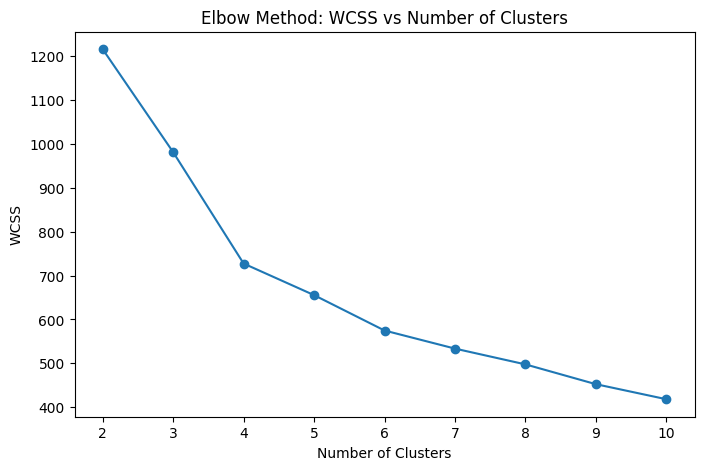

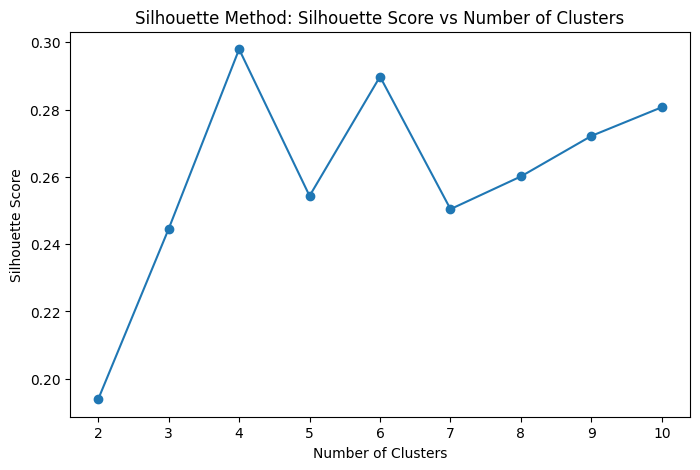

In [2]:
# Elbow Method: Plot WCSS
wcss = []
range_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_cols])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method: WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method: Plot Silhouette Score
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df[numeric_cols])
    silhouette_avg = silhouette_score(df[numeric_cols], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Method: Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()